# House Prices: Advanced Regression Techniques:

## Kaggle dataset exercice for the subject Research and Innovation from MSc Mathematical Modelling For Science and Engineering at UAB

### Created by Marc Fuster Rullan and Andrés Puy Enfedaque




Import basic packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load the dataset: We will just only load the training subset. Later we will load the test dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Visualize the structure and entries of the dataset

In [4]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Describe basic properties of the dataset
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's focus on the most important variable: SalePrice

In [6]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

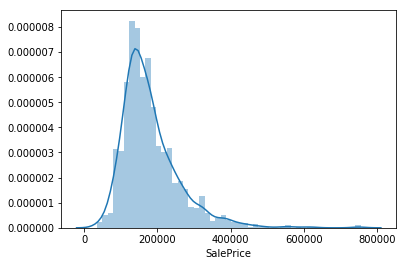

In [7]:
sns.distplot(train_df['SalePrice'])

Now we obtain the correlation heatmap in order to know which are the correlated variables

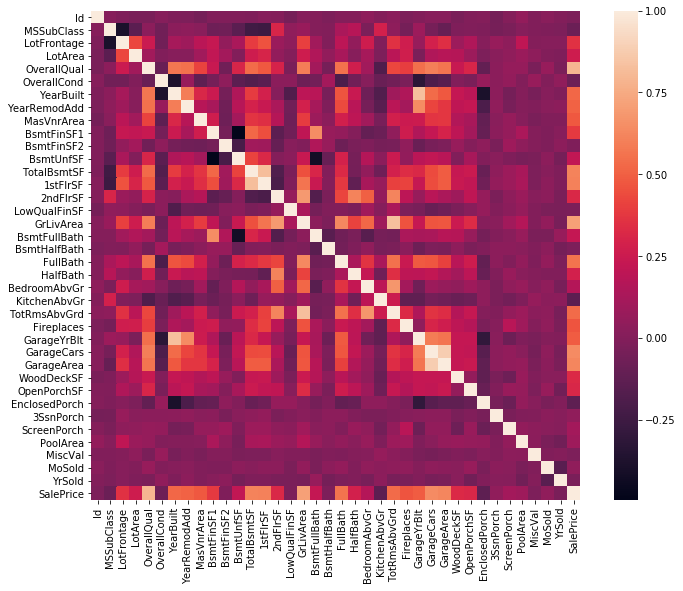

In [8]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

What we want is the correlations of the variables with #SalePrice. Therefore we just select the correlations with this variable using

In [9]:
corrmat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

This correlation number (Pearson's r) gives us an idea of the correlation. Positive means that if one is getting larger so does the other. Otherwise, negative means that if one gets bigger the other decreases. Numbers close to 0 means no correlation

<img src="correlation.png">

 We can see some important positive correlations such as OverallQual (0.790982) and GrLivArea (0.708624), ...

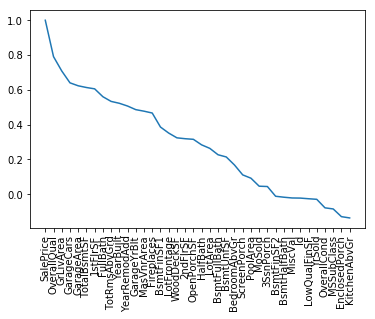

In [10]:
plt.plot(corrmat['SalePrice'].sort_values(ascending=False))
plt.xticks(rotation=90);

### Id is completely uncorrelated: so let's copy it and drop it

In [11]:
#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)



### Let's see the dataset lack of data

Those are the Variable which have some features incomplete. The logical action would be to delete the features which have a significant incomplete data. However, the ones that have a lower missing ratio should not be deleted because they may have a large significance to the model prediction. We could do many things in this situation: 

First of all we will clean all the dataset: both the test and train. We will join them and then separate them 

In [12]:
ntrain=len(train_df)

#Now we need also to drop SalePrice because test df does not have it
train_y=train_df['SalePrice']
train_df=train_df.drop(['SalePrice'],axis=1)

all_data=pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)

In [13]:

total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data['Total']>0.1)


PoolQC            True
MiscFeature       True
Alley             True
Fence             True
FireplaceQu       True
LotFrontage       True
GarageCond        True
GarageQual        True
GarageYrBlt       True
GarageFinish      True
GarageType        True
BsmtCond          True
BsmtExposure      True
BsmtQual          True
BsmtFinType2      True
BsmtFinType1      True
MasVnrType        True
MasVnrArea        True
MSZoning          True
BsmtHalfBath      True
Utilities         True
Functional        True
BsmtFullBath      True
BsmtFinSF2        True
BsmtFinSF1        True
Exterior2nd       True
BsmtUnfSF         True
TotalBsmtSF       True
Exterior1st       True
SaleType          True
                 ...  
YearRemodAdd     False
YearBuilt        False
SaleCondition    False
HeatingQC        False
ExterQual        False
ExterCond        False
YrSold           False
MoSold           False
MiscVal          False
PoolArea         False
ScreenPorch      False
3SsnPorch        False
EnclosedPor

Following the Pmarcelino guide, we will delete the features which have more than 15% of entries missing (until LotFrontage) because filling them could be worse than the information we are loosing. Moreover citing PMarcelino "None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?)"

Following his advice again, we will delete GaragaeX due to the fact that filling them would cost too much time and they are strongly correlated to GarageCars. The same with BmstX since they are not correlated to anything.

"Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'. Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable."

In [14]:
# We also must delete it from test

all_data = all_data.drop((missing_data[missing_data['Total'] > 0.1]).index,1)
#all_data = all_data.drop(all_data.loc[all_data['Electrical'].isnull()].index)
all_data.isnull().sum().max() #just checking that there's no missing data missing...

0

In [15]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data['Total']>0)


SaleCondition    False
Heating          False
ExterCond        False
ExterQual        False
RoofMatl         False
RoofStyle        False
YearRemodAdd     False
YearBuilt        False
OverallCond      False
OverallQual      False
HouseStyle       False
BldgType         False
Condition2       False
Condition1       False
Neighborhood     False
LandSlope        False
LotConfig        False
LandContour      False
LotShape         False
Street           False
LotArea          False
Foundation       False
HeatingQC        False
YrSold           False
CentralAir       False
MoSold           False
MiscVal          False
PoolArea         False
ScreenPorch      False
3SsnPorch        False
EnclosedPorch    False
OpenPorchSF      False
WoodDeckSF       False
PavedDrive       False
Fireplaces       False
TotRmsAbvGrd     False
KitchenAbvGr     False
BedroomAbvGr     False
HalfBath         False
FullBath         False
GrLivArea        False
LowQualFinSF     False
2ndFlrSF         False
1stFlrSF   

In [16]:
#Just to make sure we have not neglected all information about the pool. We still have it in PoolArea
all_data['PoolArea'].describe()

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

## Now it is time to take care of Text and Categorical Attributes

We have two options: to drop all the features which are categorical or to encode the categorical features. The first one is much simpler but you can be missing information. The second one is more complex but you may gain some accuracy.


If we would choose to encode the categorical data we will follow:
Now PMarcelino guide has finished. We will continue using MAINLY the "Using Categorical Data with One Hot Encoding" from DanB on Kaggle or LINE 45 OF SERIGNE


But for now we will use LINE 45 of Serigne


In [17]:
for i in all_data:
    print(i)

MSSubClass
LotArea
Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleCondition


In [18]:
for i in all_data:
    if type(all_data[i][4])==str:
        print(i)
        all_data=all_data.drop([i],axis=1)
       

Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
PavedDrive
SaleCondition


In [19]:
for i in all_data:
    print(i)

MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold


## Select and Train a Model

In [20]:
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

Import Basic ML algorithms

In [21]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

###  Just a try from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard Deberiamos provar de hacerlo como en el libro HandsOn

In [22]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse= np.sqrt(-cross_val_score(model, train_df.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [23]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [24]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [25]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [26]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [27]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [28]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

### Results

In [29]:
def runmodel(model):
    tic=time.time()
    score = rmsle_cv(model)
    print(" score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    toc=time.time()
    elapsedtime=np.abs(toc-tic)
    print('The time taken to train the model is: {:.2f} s'
     .format(elapsedtime))
    return(score.mean(),score.std(),elapsedtime)

In [30]:
print('\n Lasso \t')
lasso_score=runmodel(lasso)

print('\n Elastic NET \t')
Enet_score=runmodel(ENet)

print('\n Kernel Ridge \t')
KRR_score=runmodel(KRR)

print('\n Gboost \t')
GBoost_score=runmodel(GBoost)

print('\n XGB \t')
model_xgb_score=runmodel(model_xgb)

print('\n LGB \t')
model_lgb_score=runmodel(model_lgb)


 Lasso 	
 score: 36938.1415 (5980.6995)

The time taken to train the model is: 0.58 s

 Elastic NET 	
 score: 36937.8706 (5980.6559)

The time taken to train the model is: 0.38 s

 Kernel Ridge 	
 score: 141553.0346 (107627.0176)

The time taken to train the model is: 3.01 s

 Gboost 	
 score: 30526.1259 (5582.6315)

The time taken to train the model is: 24.82 s

 XGB 	
 score: 28812.6750 (3949.8780)

The time taken to train the model is: 3.54 s

 LGB 	
 score: 30414.3261 (4383.9658)

The time taken to train the model is: 0.71 s


let's try now with some feature engineering

In [31]:
"""
train_df["TotalBath"] = train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]) + \
train_df["FullBath"] + (0.5 * train_df["HalfBath"])
# Total SF for house (incl. basement)
train_df["AllSF"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train_df["AllFlrsSF"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"]
# Total SF for porch
train_df["AllPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + \
train_df["3SsnPorch"] + train_df["ScreenPorch"]
"""

'\ntrain_df["TotalBath"] = train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]) + train_df["FullBath"] + (0.5 * train_df["HalfBath"])\n# Total SF for house (incl. basement)\ntrain_df["AllSF"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]\n# Total SF for 1st + 2nd floors\ntrain_df["AllFlrsSF"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"]\n# Total SF for porch\ntrain_df["AllPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]\n'

https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners  Skewness tutorial

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset  Feature Engineering

In [32]:
"""
print('\n Lasso \t')
lasso_score=runmodel(lasso)

print('\n Elastic NET \t')
Enet_score=runmodel(ENet)

print('\n Kernel Ridge \t')
KRR_score=runmodel(KRR)

print('\n Gboost \t')
GBoost_score=runmodel(GBoost)

print('\n XGB \t')
model_xgb_score=runmodel(model_xgb)

print('\n LGB \t')
model_lgb_score=runmodel(model_lgb)
"""

"\nprint('\n Lasso \t')\nlasso_score=runmodel(lasso)\n\nprint('\n Elastic NET \t')\nEnet_score=runmodel(ENet)\n\nprint('\n Kernel Ridge \t')\nKRR_score=runmodel(KRR)\n\nprint('\n Gboost \t')\nGBoost_score=runmodel(GBoost)\n\nprint('\n XGB \t')\nmodel_xgb_score=runmodel(model_xgb)\n\nprint('\n LGB \t')\nmodel_lgb_score=runmodel(model_lgb)\n"

### Let's try to delete the skewness of the data

In [33]:
"""

from scipy.stats import norm, skew #for some statistics

# Check the skew of all numerical features
skewed_feats = train_df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head(10))

skewness = skewness[abs(skewness) > 5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_df[feat] = boxcox1p(train_df[feat], lam)
    test_df[feat] = boxcox1p(test_df[feat], lam)   
"""

'\n\nfrom scipy.stats import norm, skew #for some statistics\n\n# Check the skew of all numerical features\nskewed_feats = train_df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)\nprint("\nSkew in numerical features: \n")\nskewness = pd.DataFrame({\'Skew\' :skewed_feats})\nprint(skewness.head(10))\n\nskewness = skewness[abs(skewness) > 5]\nprint("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))\n\nfrom scipy.special import boxcox1p\nskewed_features = skewness.index\nlam = 0.15\nfor feat in skewed_features:\n    train_df[feat] = boxcox1p(train_df[feat], lam)\n    test_df[feat] = boxcox1p(test_df[feat], lam)   \n'

In [34]:
"""
print('\n Lasso \t')
lasso_score_with_coxboxtransformation=runmodel(lasso)

print('\n Elastic NET \t')
Enet_score_with_coxboxtransformation=runmodel(ENet)

print('\n Kernel Ridge \t')
KRR_score_with_coxboxtransformation=runmodel(KRR)

print('\n Gboost \t')
GBoost_score_with_coxboxtransformation=runmodel(GBoost)

print('\n XGB \t')
model_xgb_score_with_coxboxtransformation=runmodel(model_xgb)

print('\n LGB \t')
model_lgb_score_with_coxboxtransformation=runmodel(model_lgb)
"""

"\nprint('\n Lasso \t')\nlasso_score_with_coxboxtransformation=runmodel(lasso)\n\nprint('\n Elastic NET \t')\nEnet_score_with_coxboxtransformation=runmodel(ENet)\n\nprint('\n Kernel Ridge \t')\nKRR_score_with_coxboxtransformation=runmodel(KRR)\n\nprint('\n Gboost \t')\nGBoost_score_with_coxboxtransformation=runmodel(GBoost)\n\nprint('\n XGB \t')\nmodel_xgb_score_with_coxboxtransformation=runmodel(model_xgb)\n\nprint('\n LGB \t')\nmodel_lgb_score_with_coxboxtransformation=runmodel(model_lgb)\n"

### Now let's use stacking models

## Final Training and Prediction

In [35]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [36]:
def tryontest(model):
    model.fit(train_df, train_y)
    train_pred = model.predict(train_df)
    test_pred = model.predict(test_df) #np.expm1(model.predict(test_df))
    print("The model applied to the training gives an RMSE of: \t")
    print(rmsle(train_y, train_pred))
    print("\n and predicts on the test set:")
    print(test_pred)
    return test_pred

In [37]:
test_result_GBoost=tryontest(GBoost)

The model applied to the training gives an RMSE of: 	
13749.220438210315

 and predicts on the test set:
[127924.65489502 164550.3177957  189008.7203559  ... 154746.97504979
 122395.86487692 216806.37377724]


In [38]:
test_result_lgb=tryontest(model_xgb)

The model applied to the training gives an RMSE of: 	
6863.81685650634

 and predicts on the test set:
[132106.55 161833.88 190966.06 ... 159680.47 125540.21 214075.77]


In [39]:
test_result_xgb=tryontest(model_lgb)

The model applied to the training gives an RMSE of: 	
19369.818987997704

 and predicts on the test set:
[121914.37310372 162616.46758072 195891.05104073 ... 170231.14526546
 134436.43205171 232472.59166311]


In [40]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [41]:
averaged_models = AveragingModels(models = (GBoost, model_lgb))  #(ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 29842.7686 (4956.6377)



In [42]:
#test_result_averaged=tryontest(averaged_models)
averaged_models.fit(train_df.values, train_y)
averaged_train_pred = averaged_models.predict(train_df.values)
averaged_pred = averaged_models.predict(test_df.values)

print("The model applied to the training gives an RMSE of: \t")
print(rmsle(train_y, averaged_train_pred))
print("\n and predicts on the test set:")
print(averaged_pred)



The model applied to the training gives an RMSE of: 	
15357.742323394765

 and predicts on the test set:
[124919.51399937 163583.39268821 192449.88569832 ... 162489.06015762
 128416.14846432 224639.48272018]


In [43]:
# the best one is xgb, so we will use it

In [44]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = test_result_xgb
sub.to_csv('submission.csv',index=False)